In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import sys
import os
from scipy.stats import norm
from scipy.stats import kurtosis, skew

# Ejercicio 1

In [3]:
np.random.seed(42)
w1=0.10
w2=0.90
mu1=-1
mu2=0
varianza_1=0.25
varianza_2=0.4

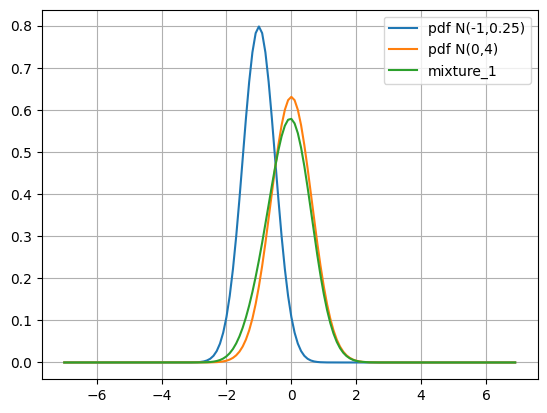

,datos,phi_1,phi_2,mixture_1
0,-7.0,4.292767e-32,1.582498e-27,1.424252e-27
1,-6.9,4.638294e-31,8.993520e-27,8.094215e-27
2,-6.8,4.815122e-30,4.984929e-26,4.486485e-26
3,-6.7,4.802691e-29,2.694827e-25,2.425393e-25
4,-6.6,4.602461e-28,1.420841e-24,1.278803e-24


In [4]:
datos=np.arange(start=-7,stop=7,step=0.1)
df_datos=pd.DataFrame(datos,columns=['datos'])

df_datos['phi_1']=norm.pdf(loc=mu1,scale=np.sqrt(varianza_1),x=df_datos['datos'])
df_datos['phi_2']=norm.pdf(loc=mu2,scale=np.sqrt(varianza_2),x=df_datos['datos'])


df_datos['mixture_1']=w1*df_datos['phi_1']+w2*df_datos['phi_2']

plt.figure()
plt.plot(df_datos['datos'],df_datos['phi_1'],label='pdf N(-1,0.25)')
plt.plot(df_datos['datos'],df_datos['phi_2'],label='pdf N(0,4)')
plt.plot(df_datos['datos'],df_datos['mixture_1'],label='mixture_1')
plt.legend()
plt.grid()
plt.show()

df_datos.head()

## Calculo la media, la varianza, curtosis y asimetría de la mixtura

In [5]:
# Normalización (por si acaso)
dx = 0.1
mixture = df_datos['mixture_1'].values  # Use the mixture density from the grid
x = datos
area = np.sum(mixture * dx)
# Media
mu = np.sum(x * mixture * dx) / area

# Varianza
var = np.sum((x - mu)**2 * mixture * dx) / area
std = np.sqrt(var)

# Asimetría (skewness)
skewness = np.sum(((x - mu)**3) * mixture * dx) / (area * std**3)

# Curtosis
kurt = np.sum(((x - mu)**4) * mixture * dx) / (area * std**4)
kurt_excess = kurt - 3

# Resultados
print(f"Media: {mu:.4f}")
print(f"Varianza: {var:.4f}")
print(f"Asimetría: {skewness:.4f}")
print(f"Curtosis: {kurt:.4f}")
print(f"Curtosis en exceso: {kurt_excess:.4f}")

Media: -0.1000
Varianza: 0.4750
Asimetría: -0.0962
Curtosis: 2.9232
Curtosis en exceso: -0.0768


### Densidad de la mixtura y la densidad de una variable aleatoria normal con la misma media y la misma varianza que la mixtura.

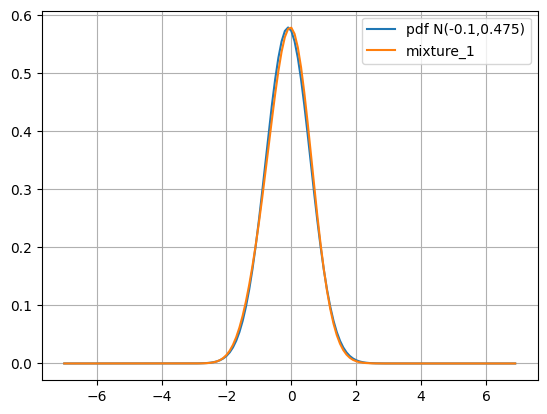

In [6]:
mu3=-0.1
varianza_3=0.4750
df_datos['normal_mixtura']=norm.pdf(loc=mu3,scale=np.sqrt(varianza_3),x=df_datos['datos'])
plt.figure()
plt.plot(df_datos['datos'],df_datos['normal_mixtura'],label='pdf N(-0.1,0.475)')
plt.plot(df_datos['datos'],df_datos['mixture_1'],label='mixture_1')
plt.legend()
plt.grid()
plt.show()


En funcion del coeficiente de asimetria  -0.0962 y Curtosis: 2.9232. Es platicurtica (KE negativa) y asimetrica negativa (asimetria -0.09) por muy poquito


### D
Genere una muestra de 1500 valores aleatorios de esta mixtura y realice un QQ-
Plot a partir de estos valores, donde en el eje vertical aparezcan los valores
teóricos de la normal estándar y en el horizontal los valores aleatorios generados
estandarizados. Estos valores aleatorios puede generarlos usando el software
que desee (deberá entregar el archivo donde los genera). ¿Qué le sugiere el QQ-
Plot?


In [7]:
n = 1500
n19 = np.random.normal(mu1,np.sqrt(varianza_1),size=n)
n14 = np.random.normal(mu2,np.sqrt(varianza_2),size=n)
u01 = np.random.uniform(size=n)
bootstrap_mxt = np.where(u01 < w1, n19,n14)

promedio = bootstrap_mxt.mean()
desvio_std = bootstrap_mxt.std()
ke = stats.kurtosis(bootstrap_mxt)
asimetria = stats.skew(bootstrap_mxt)

boostrap_estandar = np.sort((bootstrap_mxt - promedio) / desvio_std)

print(f'Promedio: {promedio}')
print(f'Desvío std: {desvio_std}')
print(f'Asimetría: {asimetria}')
print(f'curtosis en exceso: {ke}')

df_bootstrap = pd.DataFrame({'N(-1,9)': n19, 'N(-1,4)':n14, 'U[0,1]':u01, 'Bootstrap de Mixtura':bootstrap_mxt})
df_bootstrap.head(8)

Promedio: -0.09166343894804774
Desvío std: 0.6794010209415694
Asimetría: -0.07119545401315887
curtosis en exceso: -0.12752698753041036


,"N(-1,9)","N(-1,4)","U[0,1]",Bootstrap de Mixtura
0,-0.751643,0.492279,0.818740,0.492279
1,-1.069132,-0.348600,0.983567,-0.348600
2,-0.676156,-0.517474,0.259671,-0.517474
3,-0.238485,-0.002134,0.969724,-0.002134
4,-1.117077,-0.107634,0.431234,-0.107634
5,-1.117068,-0.286647,0.347519,-0.286647
6,-0.210394,0.440434,0.050350,-0.210394
7,-0.616283,0.604188,0.052765,-0.616283


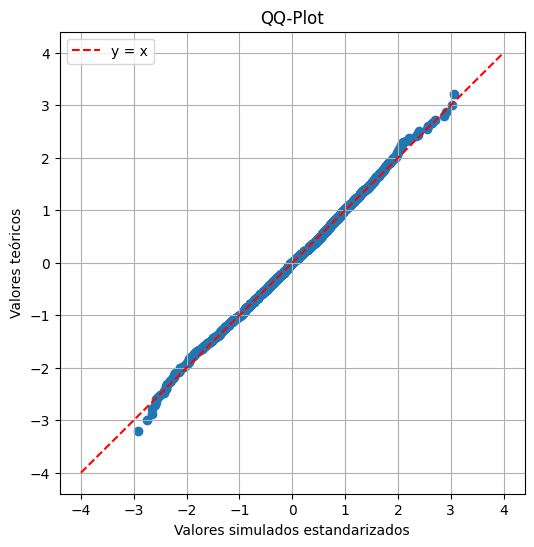

In [8]:
cuantiles_teoricos = stats.norm.ppf(np.arange(1,n+1)/n)
plt.figure(figsize=(6,6))
plt.scatter(boostrap_estandar, cuantiles_teoricos)
plt.plot([-4, 4], [-4, 4], 'r--', label="y = x")
plt.xlabel("Valores simulados estandarizados")
plt.ylabel("Valores teóricos")
plt.title("QQ-Plot")
plt.grid(True)
plt.legend()
plt.show()

Se desvía muy poco de la normal eso se ve en el qqplot porque esta muy sobre la linea. Ahi se ve que es muy parecido a un gráfico de una simétrica donde las colas apenas se despegan. Se ve que la KE es apenas negativa porque baja un poquito y luego va por arrriba en la parte derecha y en la izquierda sube apenas y luego baja. Si tuviera que guiarme por el qqplot solo, diria que sigue a la normal

# Ejercicio 2

In [9]:
import pandas as pd
import numpy as np
from arch.unitroot import DFGLS
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt


In [10]:
df = pd.read_stata("Precios_y_Dinero_data.dta")
#df = df.set_index("mmyy")
df["ipc"] = pd.to_numeric(df["ipc"], errors="coerce")
df["m"] = pd.to_numeric(df["m"], errors="coerce")
df["infl"] = np.log(df["ipc"]).diff()
# Crecimiento de la base monetaria
df["crec_m"] = np.log(df["m"]).diff()
df.set_index('mmyy',inplace=True)
#df


## Graficamos las series

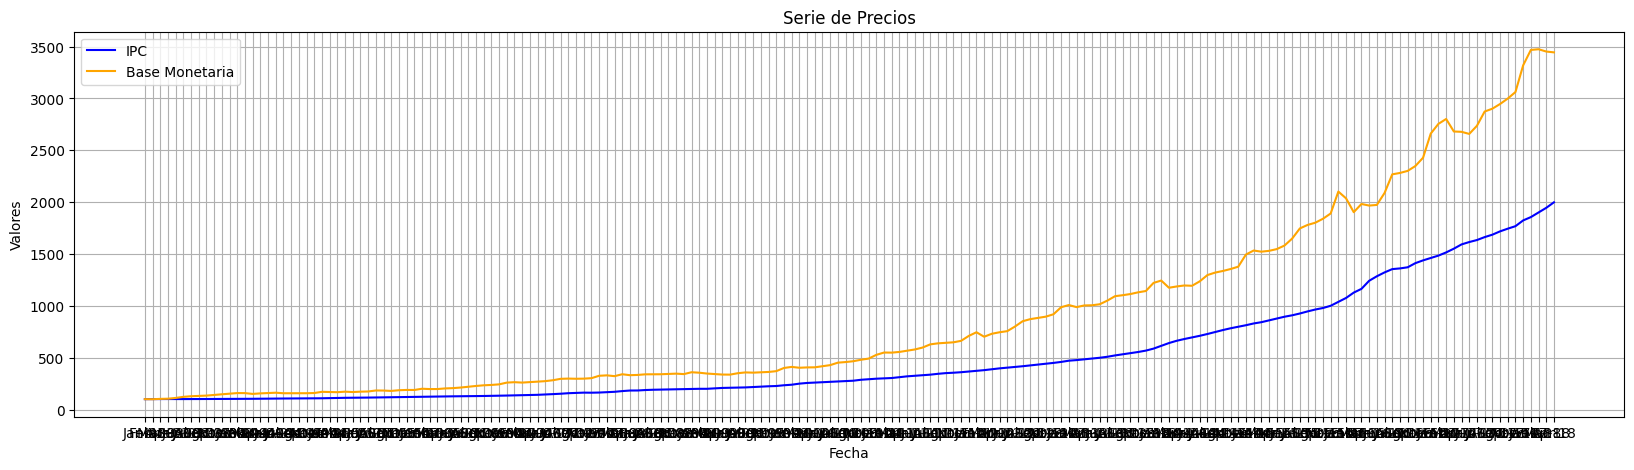

In [11]:
def graficar_serie_con_base(df, titulo):
    """Grafica una serie de tiempo con base monetaria."""
    plt.figure(figsize=(20, 5))
    plt.plot(df.index, df['ipc'], color='blue', label='IPC')
    plt.plot(df.index, df['m'], color='orange', label='Base Monetaria')
    plt.title(titulo)
    plt.xlabel('Fecha')
    plt.ylabel('Valores')
    plt.legend()
    plt.grid()
    plt.show()

graficar_serie_con_base(df, 'Serie de Precios')


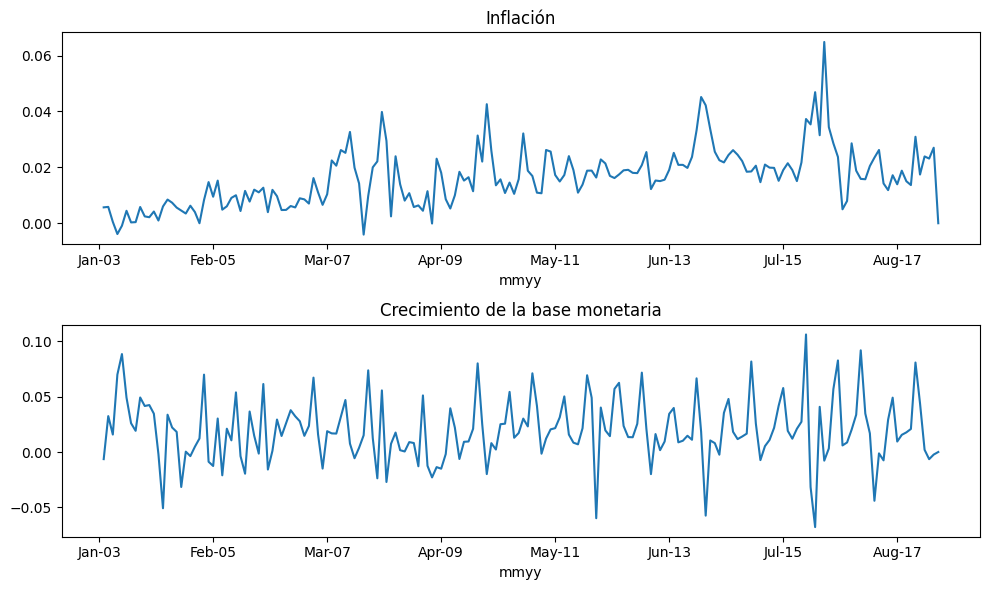

In [12]:
##Ploteamos la series
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
df["infl"].plot(ax=ax[0], title="Inflación")
df["crec_m"].plot(ax=ax[1], title="Crecimiento de la base monetaria")
plt.tight_layout()
plt.show() 


### Vemos la estacionariedad

In [13]:
from statsmodels.tsa.stattools import adfuller 

print("DFGLS Inflación:\n", DFGLS(df["infl"].dropna(),trend='ct').summary())
print("DFGLS Crecimiento M:\n", DFGLS(df["crec_m"].dropna(),trend='ct').summary())

DFGLS Inflación:
       Dickey-Fuller GLS Results      
Test Statistic                 -7.120
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.52 (1%), -2.95 (5%), -2.66 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
DFGLS Crecimiento M:
       Dickey-Fuller GLS Results      
Test Statistic                 -2.911
P-value                         0.044
Lags                               14
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.53 (1%), -2.96 (5%), -2.67 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


Al validar contra DFLGS vemos que ambas son estacionarias si tomo consntante y tendencia. La base moenraia al 5%
Ahora  corremos el ADF

In [14]:
adf_test_crec_m = adfuller(df["crec_m"].dropna(), regression="ct")
print("ADF lags=1 trend:", adf_test_crec_m)
print("ADF lags=1 trend estadistico:", adf_test_crec_m[0])
print("ADF lags=1 trend p-value:", adf_test_crec_m[1])
print("ADF LAGS: ", adf_test_crec_m[2])
print("ADF observaciones:", adf_test_crec_m[3])
print("ADF lags=8 trend criticos:", adf_test_crec_m[4])

ADF lags=1 trend: (-3.616653248922785, 0.028466589597599443, 14, 169, {'1%': -4.01336177607815, '5%': -3.4367944741153003, '10%': -3.14249147004781}, -784.1226772063699)
ADF lags=1 trend estadistico: -3.616653248922785
ADF lags=1 trend p-value: 0.028466589597599443
ADF LAGS:  14
ADF observaciones: 169
ADF lags=8 trend criticos: {'1%': -4.01336177607815, '5%': -3.4367944741153003, '10%': -3.14249147004781}


In [15]:
adf_test_inf = adfuller(df["infl"].dropna(), regression="ct")
print("ADF lags=1 trend:", adf_test_inf)
print("ADF lags=1 trend estadistico:", adf_test_inf[0])
print("ADF lags=1 trend p-value:", adf_test_inf[1])
print("ADF LAGS: ", adf_test_inf[2])
print("ADF observaciones:", adf_test_inf[3])
print("ADF lags=8 trend criticos:", adf_test_inf[4])

ADF lags=1 trend: (-7.462201793917492, 1.2449733297281147e-09, 0, 183, {'1%': -4.009111257948332, '5%': -3.434758480556457, '10%': -3.141299816210755}, -1160.866438098236)
ADF lags=1 trend estadistico: -7.462201793917492
ADF lags=1 trend p-value: 1.2449733297281147e-09
ADF LAGS:  0
ADF observaciones: 183
ADF lags=8 trend criticos: {'1%': -4.009111257948332, '5%': -3.434758480556457, '10%': -3.141299816210755}


Segun adf con constante y tendendencia ambos p-values son significativos pr lo tanto son estacionarias

### Genero el modelo VAR

In [16]:
# Selección de variables
data = df[["infl", "crec_m"]].dropna()  # Es bivariado porque tiene dos variables
# VAR(2)
model=VAR(data)
var2_1 = model.fit(maxlags=2)
print(var2_1.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 03, Sep, 2025
Time:                     17:42:21
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -16.6902
Nobs:                     182.000    HQIC:                  -16.7949
Log likelihood:           1028.34    FPE:                4.73252e-08
AIC:                     -16.8663    Det(Omega_mle):     4.48282e-08
--------------------------------------------------------------------
Results for equation infl
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.004189         0.001318            3.179           0.001
L1.infl           0.521046         0.075866            6.868           0.000
L1.crec_m         0.020393         0.020666            0.987           0.324


/opt/anaconda3/envs/islp/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/opt/anaconda3/envs/islp/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [17]:
print("Criterios de selección:\n", model.select_order().summary())

Criterios de selección:
  VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -16.36      -16.33   7.827e-08      -16.35
1       -16.82     -16.71*   4.964e-08      -16.77
2       -16.87      -16.69   4.694e-08      -16.80
3       -16.92      -16.66   4.500e-08     -16.81*
4       -16.91      -16.58   4.528e-08      -16.78
5       -16.89      -16.49   4.618e-08      -16.73
6       -16.90      -16.42   4.557e-08      -16.71
7       -16.92      -16.37   4.479e-08      -16.70
8       -16.91      -16.28   4.531e-08      -16.66
9       -16.89      -16.19   4.622e-08      -16.61
10      -16.95      -16.18   4.350e-08      -16.64
11      -16.94      -16.10   4.392e-08      -16.60
12      -17.06      -16.14   3.925e-08      -16.68
13     -17.06*      -16.06  3.919e-08*      -16.66
14      -17.03      -15.96   4.055e-08      -16.59
--------------------------------------------------


Usando el creitedio de AIC tomamos 13 rezagos

In [18]:
model=VAR(data)
var2_13 = model.fit(maxlags=13)
print(var2_13.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 03, Sep, 2025
Time:                     17:42:21
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -16.0522
Nobs:                     171.000    HQIC:                  -16.6418
Log likelihood:           1026.01    FPE:                3.98158e-08
AIC:                     -17.0443    Det(Omega_mle):     2.96973e-08
--------------------------------------------------------------------
Results for equation infl
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.002879         0.002034            1.415           0.157
L1.infl            0.490504         0.085480            5.738           0.000
L1.crec_m          0.010677         0.027747            0.385           0

/opt/anaconda3/envs/islp/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/opt/anaconda3/envs/islp/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [19]:
# Estabilidad del VAR: raíces dentro del círculo unitario
print("Raíces del VAR(2):", var2_1.roots)
print("¿Estable?", np.all(np.abs(var2_1.roots) > 1))

Raíces del VAR(2): [-4.1812976 -0.j          0.30437965+2.13809918j  0.30437965-2.13809918j
  1.27519296-0.j        ]
¿Estable? True


In [43]:
from statsmodels.stats.diagnostic import acorr_ljungbox
resid = var2_13.resid
print("Ljung-Box test residuos VAR(2) - infl:")
print(acorr_ljungbox(resid["infl"], lags=[10], return_df=True))
print("Ljung-Box test residuos VAR(2) - crec_m:")
print(acorr_ljungbox(resid["crec_m"], lags=[10], return_df=True))

# Test de causalidad de Granger
test_1=var2_1.test_causality("crec_m", ["infl"],kind='f')
print("Granger causality: infl → crec_m")
print(test_1.summary())

if(test_1.pvalue < 0.10):
    print("Rechazamos H0: infl NO causa crec_m")
else:
    print("No rechazamos H0: infl no causa crec_m")
    print(f"p-value: {test_1.pvalue}")

test_2=var2_1.test_causality("infl", ["crec_m"],kind='f')
print("Granger causality: crec_m → infl")
print(test_2.summary())

if(test_2.pvalue < 0.10):
    print("Rechazamos H0: crec_m NO causa infl")
else:
    print("No rechazamos H0: crec_m no causa infl")
    print(f"p-value: {test_2.pvalue}")

Ljung-Box test residuos VAR(2) - infl:
     lb_stat  lb_pvalue
10  1.673983   0.998283
Ljung-Box test residuos VAR(2) - crec_m:
     lb_stat  lb_pvalue
10  7.591071   0.668711
Granger causality: infl → crec_m
Granger causality F-test. H_0: infl does not Granger-cause crec_m. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
         4.571          3.021   0.011 (2, 354)
----------------------------------------------
Rechazamos H0: infl NO causa crec_m
Granger causality: crec_m → infl
Granger causality F-test. H_0: crec_m does not Granger-cause infl. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
        0.5271          3.021   0.591 (2, 354)
----------------------------------------------
No rechazamos H0: crec_m no causa infl
p-value: 0.5907513827900799


### Interpretacion: 
H0: infl does not Granger-cause crec_m. Conclusion: reject H_0 at 5% significance level.
H0: la inflacion no causa en el sentido de granger el crecimiento de la base monetaria.

Como rechazo H0, los rezagos de la inflación da información estadística para predecir el crecimiento de la base monetaria. 
En términos prácticos: los valores pasados de la inflación ayudan a explicar la dinámica de crec_m.


El test de Granger no implica causalidad real o estructural → solo habla de “capacidad predictiva” en el marco del VAR.

### Tomamos mas rezagos para ver si modemos rechazar la otra hipotesis que es la que queríamos probar

In [21]:
model2=VAR(data)
var2_50 = model2.fit(50)
print(var2_50.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 03, Sep, 2025
Time:                     17:42:21
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -13.1712
Nobs:                     134.000    HQIC:                  -15.7644
Log likelihood:           996.877    FPE:                6.00340e-08
AIC:                     -17.5396    Det(Omega_mle):     1.95196e-08
--------------------------------------------------------------------
Results for equation infl
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.000557         0.005074            0.110           0.913
L1.infl            0.617620         0.181843            3.396           0.001
L1.crec_m          0.066525         0.073559            0.904           0

/opt/anaconda3/envs/islp/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/opt/anaconda3/envs/islp/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [22]:
print("Criterios de selección:\n", model2.select_order().summary())

Criterios de selección:
  VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -16.36      -16.33   7.827e-08      -16.35
1       -16.82     -16.71*   4.964e-08      -16.77
2       -16.87      -16.69   4.694e-08      -16.80
3       -16.92      -16.66   4.500e-08     -16.81*
4       -16.91      -16.58   4.528e-08      -16.78
5       -16.89      -16.49   4.618e-08      -16.73
6       -16.90      -16.42   4.557e-08      -16.71
7       -16.92      -16.37   4.479e-08      -16.70
8       -16.91      -16.28   4.531e-08      -16.66
9       -16.89      -16.19   4.622e-08      -16.61
10      -16.95      -16.18   4.350e-08      -16.64
11      -16.94      -16.10   4.392e-08      -16.60
12      -17.06      -16.14   3.925e-08      -16.68
13     -17.06*      -16.06  3.919e-08*      -16.66
14      -17.03      -15.96   4.055e-08      -16.59
--------------------------------------------------


In [44]:
from statsmodels.stats.diagnostic import acorr_ljungbox
##test de causalidad de granger al 10% 


resid = var2_50.resid

# Test de causalidad de Granger
test_1_var2_50=var2_50.test_causality("crec_m", ["infl"],kind='f')
print("Granger causality: infl → crec_m")
print(test_1_var2_50.summary())

if(test_1_var2_50.pvalue < 0.10):
    print("Rechazamos H0: crec_m NO causa infl")
    print(f"p-value: {test_1_var2_50.pvalue}")
else:
    print("No rechazamos H0: crec_m no causa infl")
    print(f"p-value: {test_1_var2_50.pvalue}")
print()

test_2_var2_50=var2_50.test_causality("infl", ["crec_m"],kind='f')
print("Granger causality: crec_m → infl")
print(test_2_var2_50.summary())
print()

if(test_2_var2_50.pvalue < 0.10):
    print("Rechazamos H0: crec_m NO causa infl")
    print(f"p-value: {test_2_var2_50.pvalue}")
else:
    print("No rechazamos H0: crec_m no causa infl")
    print(f"p-value: {test_2_var2_50.pvalue}")


Granger causality: infl → crec_m
Granger causality F-test. H_0: infl does not Granger-cause crec_m. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
         1.203          1.541   0.239 (50, 66)
----------------------------------------------
No rechazamos H0: crec_m no causa infl
p-value: 0.23905211713703708

Granger causality: crec_m → infl
Granger causality F-test. H_0: crec_m does not Granger-cause infl. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
         1.757          1.541   0.016 (50, 66)
----------------------------------------------

Rechazamos H0: crec_m NO causa infl
p-value: 0.0160569899856615


### Tomando 50 rezagos logro rechzar la hipotesis, por lo tanto tengo evidencia que los rezagos de la base monetaria tiene informacion para predecir la inflación


# Ejercicio 3

La empresa de bienes raíces Windsor Realty Corp lo contrata a usted para que le indique,
basándose en todas las observaciones (546 observaciones) del Ejemplo Casa, que le
indique para una nueva casa a la venta con los siguientes atributos:
“lote de 3500 pies cuadrados, con 3 cuartos, 2 baños, construida en dos pisos,
con entrada para el auto, cuarto de recreación, calefacción central, en un
vecindario agradable (NBHD=1), sin garage, ni sótano, ni aire acondicionado
central”
a) El valor predicho de la casa (precio), es decir, un estimador puntual del precio.
b) Un intervalo de confianza del 90% y otro del 99% para el precio de la

In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy import stats

In [25]:
df_casa = pd.read_excel('./Ejemplo_Casa.xls')
display(df_casa.head())

,PRECIO,LOTE,CUARTOS,BANOS,PISOS,ENTRADA,REC,SOTANO,CALEF,AIRE,GARAGE,NBHD
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [26]:
y=df_casa['PRECIO']
X=sm.add_constant(df_casa.drop(columns='PRECIO'))

reg_casa=sm.OLS(y,X).fit()
display(reg_casa.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PRECIO   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     99.97
Date:                Wed, 03 Sep 2025   Prob (F-statistic):          6.18e-122
Time:                        17:42:21   Log-Likelihood:                -6034.1
No. Observations:                 546   AIC:                         1.209e+04
Df Residuals:                     534   BIC:                         1.214e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4038.3504   3409.471     -1.184      0.237   -1.07e+04    2659.271
LOTE           3.5463      0.350     10.124      0.000       2.858       4.234
CUARTOS     1832.0035   1047.000      1.750      0.081    -224.741    3888.748
BANOS       1.434e+04   1489.921      9.622      0.000    1.14e+04    1.73e+04
PISOS       6556.9457    925.290      7.086      0.000    4739.291    8374.600
ENTRADA     6687.7789   2045.246      3.270      0.001    2670.065    1.07e+04
REC         4511.2838   1899.958      2.374      0.018     778.976    8243.592
SOTANO      5452.3855   1588.024      3.433      0.001    2332.845    8571.926
CALEF       1.283e+04   3217.597      3.988      0.000    6510.706    1.92e+04
AIRE        1.263e+04   1555.021      8.124      0.000    9578.182    1.57e+04
GARAGE      4244.8290    840.544      5.050      0.000    2593.650    5896.008
NBHD        9369.5132   1669.091      5.614      0.000    6090.724    1.26e+04
==============================================================================
Omnibus:                       93.454   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.620
Skew:                           0.853   Prob(JB):                     1.70e-54
Kurtosis:                       5.824   Cond. No.                     3.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Estimador puntual del precio

In [27]:
df_prediccion=pd.DataFrame({'LOTE': [3500],'CUARTOS': [3],'BANOS': [2],'PISOS':[2],'ENTRADA':[1],'REC':[1],'SOTANO':[0],'CALEF':[1],'AIRE':[0],'GARAGE':[0],'NBHD':[1]})
X_prediccion = sm.add_constant(df_prediccion,has_constant='add')

prediccion=reg_casa.predict(X_prediccion)
print("Estimador puntual del predio:")
display(prediccion)

Estimador puntual del predio:


0    89054.710949
dtype: float64

Este es el valor de la prediccion puntual:  89054.710949

### Intervalo  de confianza

In [28]:
predc = reg_casa.get_prediction()
IC_predc = predc.summary_frame(alpha = 0.1)
IC_predc.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,66037.975672,1790.507321,63087.735069,68988.216275,40454.328871,91621.622474
1,41391.151457,1406.499937,39073.644472,43708.658442,15872.728648,66909.574266
2,39889.630131,1534.101619,37361.872308,42417.387953,14351.254621,65428.005640
3,63689.087331,2262.055723,59961.870714,67416.303948,38004.243400,89373.931261
4,49760.426466,1567.689375,47177.325693,52343.527240,24216.513813,75304.339120


In [29]:
def intervalo(alpha):
    yhat = IC_predc['mean']
    mean_ci_lower = IC_predc['mean_ci_lower'] ## Intervalo de confianza
    mean_ci_upper = IC_predc['mean_ci_upper'] ## Intervalo de confianza

    valores = pd.DataFrame([[1, 3500, 4, 2, 2, 1, 1, 0, 1, 0, 0, 1]], columns=reg_casa.model.exog_names)
    pred = reg_casa.get_prediction(valores)
    summary = pred.summary_frame(alpha=alpha)
    lower=summary['mean_ci_lower']
    upper=summary['mean_ci_upper']     
    print(f'Intevalor al {1-alpha}%: ')
    print('Lower: '+str(lower))
    print('Upper: '+str(upper))


intervalo(0.1)
intervalo(0.01)





Intevalor al 0.9%: 
Lower: 0    83872.661524
Name: mean_ci_lower, dtype: float64
Upper: 0    97900.767304
Name: mean_ci_upper, dtype: float64
Intevalor al 0.99%: 
Lower: 0    79882.486675
Name: mean_ci_lower, dtype: float64
Upper: 0    101890.942154
Name: mean_ci_upper, dtype: float64


# Ejercicio 4

verdadero o Falso y justifique. Puede justificar con una cuenta si es verdadero, con un
contraejemplo si es falso. Deje comentada su respuesta en palabras.
- a) Un activo financiero presentó un retorno logarítmico promedio diario de 0.177%
en un mes de 20 días de trading. En base a esta información es posible
determinar que el retorno simple acumulado en el mes fue de 3.6%.
- b) En el proceso AR(2), 𝑦𝑡 = 𝜌1𝑦𝑡−1 + 𝜌2𝑦𝑡−2 + 𝜀𝑡, si |𝜌1| = 1 entonces 𝑦𝑡 es no
estacionario.
- c) Si mezclo 3 normales, cada una con media 0, y varianzas 1, 4 y 9, con pesos 4/9, 3/9,
y 2/9, respectivamente, obtengo una mixtura con curtosis igual a 5.



In [45]:

retornos_mensuales=(1+(0.177/100))**20
print((retornos_mensuales-1)*100)

print((np.e**(3.54/100)-1)*100)


3.600162039014032
3.6034039543767493


a). si es posible en base a la cuenta de retornos es posible. 

b) Un AR(2) tiene que tener el polinomio con raices dentro del círculo, por lo tanto depdendera del valor de rho2

c)

In [31]:
np.random.seed(42)
w1=9/9
w2=3/9
w3=2/9
mu1=-0
mu2=0
mu3=0
varianza_1=1
varianza_2=4
varianza_3=9


datos=np.arange(start=-7,stop=7,step=0.1)
df_datos=pd.DataFrame(datos,columns=['datos'])

df_datos['phi_1']=norm.pdf(loc=mu1,scale=np.sqrt(varianza_1),x=df_datos['datos'])
df_datos['phi_2']=norm.pdf(loc=mu2,scale=np.sqrt(varianza_2),x=df_datos['datos'])
df_datos['phi_3']=norm.pdf(loc=mu3,scale=np.sqrt(varianza_3),x=df_datos['datos'])



df_datos['mixture_1']=w1*df_datos['phi_1']+w2*df_datos['phi_2']+w3*df_datos['phi_3']


# Normalización (por si acaso)
dx = 0.1
mixture = df_datos['mixture_1'].values  # Use the mixture density from the grid
x = datos
area = np.sum(mixture * dx)
# Media
mu = np.sum(x * mixture * dx) / area

# Varianza
var = np.sum((x - mu)**2 * mixture * dx) / area
std = np.sqrt(var)

# Asimetría (skewness)
skewness = np.sum(((x - mu)**3) * mixture * dx) / (area * std**3)

# Curtosis
kurt = np.sum(((x - mu)**4) * mixture * dx) / (area * std**4)
kurt_excess = kurt - 3

# Resultados
print(f"Media: {mu:.4f}")
print(f"Varianza: {var:.4f}")
print(f"Asimetría: {skewness:.4f}")
print(f"Curtosis: {kurt:.4f}")
print(f"Curtosis en exceso: {kurt_excess:.4f}")


Media: -0.0009
Varianza: 2.6050
Asimetría: -0.0092
Curtosis: 5.0195
Curtosis en exceso: 2.0195


### Rta: Si, la curtosis es de 5.0195